In [6]:
import numpy as np

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [7]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [8]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [10]:
# 예2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

In [11]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [12]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [13]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [15]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [16]:
np.random.choice(60000, 10)

array([ 5812, 59110,  7820,  2851, 48613,  5878, 17077, 58374, 20579,
        5245])

In [17]:
# 정답 레이블이 one-hot encoding일 때
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [18]:
# 정답 레이블이 one-hot encoding이 아니고 숫자 레이블로 주어졌을 때
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-7)) / batch_size

In [19]:
# 미분의 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [21]:
np.float32(1e-50)

0.0

In [22]:
# 반올림오차 문제와 함수 f의 차분 오차를 개선해서 적용한 미분 구현
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [23]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

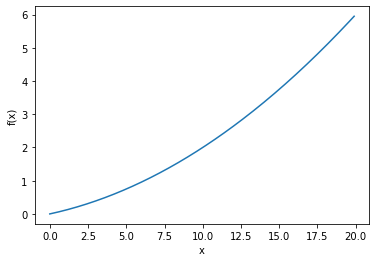

In [25]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만든다(20은 미포함).
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [26]:
numerical_diff(function_1, 5)

0.1999999999990898

In [27]:
numerical_diff(function_1, 10)

0.2999999999986347

In [28]:
# 편미분
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [29]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분 df/dx0를 구하라
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [30]:
# x0 = 3, x1 = 4일 때, x1에 대한 편미분 df/dx1을 구하라
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [32]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 형성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val  # 값 복원
        
    return grad

In [33]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [34]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [35]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])